# Note :    Riêng **Colab** phải **Ctrl+S** hoặc **Save** thì mới update được nha mọi người.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.model_selection import train_test_split


# 1.Data Preparation

## 1.1. Data Integration

In [61]:

# Read dataset into data frame
Iq = pd.read_csv('../data/IQ.csv')
It = pd.read_csv('../data/IncTmp.csv')

In [62]:
Iq_It = pd.merge(Iq, It, on=['Id', 'country'])
Iq_It.head()

,Id,country,IQ,education_expenditure,avg_income,avg_temp
0,1,Hong Kong,106,1283.0,35304.0,26.2
1,2,Japan,106,1340.0,40964.0,19.2
2,3,Singapore,106,1428.0,41100.0,31.5
3,4,Taiwan,106,NaN,NaN,26.9
4,5,China,104,183.0,4654.0,19.1


## 1.2. Data Shuffling

In [63]:
Iq_It.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     108 non-null    int64  
 1   country                108 non-null    object 
 2   IQ                     108 non-null    int64  
 3   education_expenditure  103 non-null    float64
 4   avg_income             106 non-null    float64
 5   avg_temp               108 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 5.2+ KB


In [64]:
from sklearn.utils import shuffle

Iq_It = shuffle(Iq_It)
Iq_It.head()

,Id,country,IQ,education_expenditure,avg_income,avg_temp
6,7,Netherlands,101,2386.0,45337.0,14.4
103,104,Equatorial Guinea,56,NaN,7625.0,29.9
99,100,Cameroon,67,36.0,1234.0,31.1
12,13,Germany,100,1883.0,39911.0,13.8
69,70,United Arab Emirates,82,805.0,38644.0,34.4


## 1.3. Data Preprocessing

### Handle Duplicate

In [65]:
print(Iq_It)

      Id               country   IQ  education_expenditure  avg_income  \
6      7           Netherlands  101                 2386.0     45337.0   
103  104     Equatorial Guinea   56                    NaN      7625.0   
99   100              Cameroon   67                   36.0      1234.0   
12    13               Germany  100                 1883.0     39911.0   
69    70  United Arab Emirates   82                  805.0     38644.0   
..   ...                   ...  ...                    ...         ...   
22    23               Belgium   98                 2507.0     40526.0   
86    87                 Syria   76                  252.0      4532.0   
40    41              Bermuda    92                 1748.0    108349.0   
80    81               Ecuador   79                  199.0      4159.0   
107  108                 Nepal   51                   22.0       595.0   

     avg_temp  
6        14.4  
103      29.9  
99       31.1  
12       13.8  
69       34.4  
..        ...  

In [66]:
duplicates = Iq_It.duplicated()
print("\nDuplicate Row:")
print(Iq_It[duplicates])


Duplicate Row:
Empty DataFrame
Columns: [Id, country, IQ, education_expenditure, avg_income, avg_temp]
Index: []


There are no duplicate in our data

### Handle Missing Values

In [67]:
# Display the DataFrame to inspect it
print("Original DataFrame:")
print(Iq_It)


Original DataFrame:
      Id               country   IQ  education_expenditure  avg_income  \
6      7           Netherlands  101                 2386.0     45337.0   
103  104     Equatorial Guinea   56                    NaN      7625.0   
99   100              Cameroon   67                   36.0      1234.0   
12    13               Germany  100                 1883.0     39911.0   
69    70  United Arab Emirates   82                  805.0     38644.0   
..   ...                   ...  ...                    ...         ...   
22    23               Belgium   98                 2507.0     40526.0   
86    87                 Syria   76                  252.0      4532.0   
40    41              Bermuda    92                 1748.0    108349.0   
80    81               Ecuador   79                  199.0      4159.0   
107  108                 Nepal   51                   22.0       595.0   

     avg_temp  
6        14.4  
103      29.9  
99       31.1  
12       13.8  
69       34

In [68]:
# Check for missing values
print("\nMissing values in each column:")
print(Iq_It.isnull().sum())


Missing values in each column:
Id                       0
country                  0
IQ                       0
education_expenditure    5
avg_income               2
avg_temp                 0
dtype: int64


In [69]:
# Handling missing values
# 1. Fill missing values with a specific value (e.g., 0 or mean/median of the column)
Iq_It_f = Iq_It.fillna({
    'education_expenditure': Iq_It['education_expenditure'].mean(),  # Fill with mean
    'avg_income': Iq_It['avg_income'].mean(),  # Fill with mean
    'avg_temp': Iq_It['avg_temp'].mean()  # Fill with mean
})

# Display the DataFrame after handling missing values
print("\nDataFrame after handling missing values:")
print(Iq_It_f)


DataFrame after handling missing values:
      Id               country   IQ  education_expenditure  avg_income  \
6      7           Netherlands  101            2386.000000     45337.0   
103  104     Equatorial Guinea   56             903.058252      7625.0   
99   100              Cameroon   67              36.000000      1234.0   
12    13               Germany  100            1883.000000     39911.0   
69    70  United Arab Emirates   82             805.000000     38644.0   
..   ...                   ...  ...                    ...         ...   
22    23               Belgium   98            2507.000000     40526.0   
86    87                 Syria   76             252.000000      4532.0   
40    41              Bermuda    92            1748.000000    108349.0   
80    81               Ecuador   79             199.000000      4159.0   
107  108                 Nepal   51              22.000000       595.0   

     avg_temp  
6        14.4  
103      29.9  
99       31.1  
12   

Encode

In [70]:
# Define a function to categorize IQ into intervals
def categorize_iq(iq):
    if iq < 55:
        return 1
    elif iq < 60:
        return 2
    elif iq < 65:
        return 3
    elif iq < 70:
        return 4
    elif iq < 75:
        return 5
    elif iq < 80:
        return 6
    elif iq < 85:
        return 7
    elif iq < 90:
        return 8
    elif iq < 95:
        return 9
    elif iq < 100:
        return 10
    elif iq < 105:
        return 11
    else:
        return 12

# Apply the function to the IQ column
Iq_It_f['IQ_Level'] = Iq_It_f['IQ'].apply(categorize_iq)

Iq_It_f.head()


,Id,country,IQ,education_expenditure,avg_income,avg_temp,IQ_Level
6,7,Netherlands,101,2386.000000,45337.0,14.4,11
103,104,Equatorial Guinea,56,903.058252,7625.0,29.9,2
99,100,Cameroon,67,36.000000,1234.0,31.1,4
12,13,Germany,100,1883.000000,39911.0,13.8,11
69,70,United Arab Emirates,82,805.000000,38644.0,34.4,7


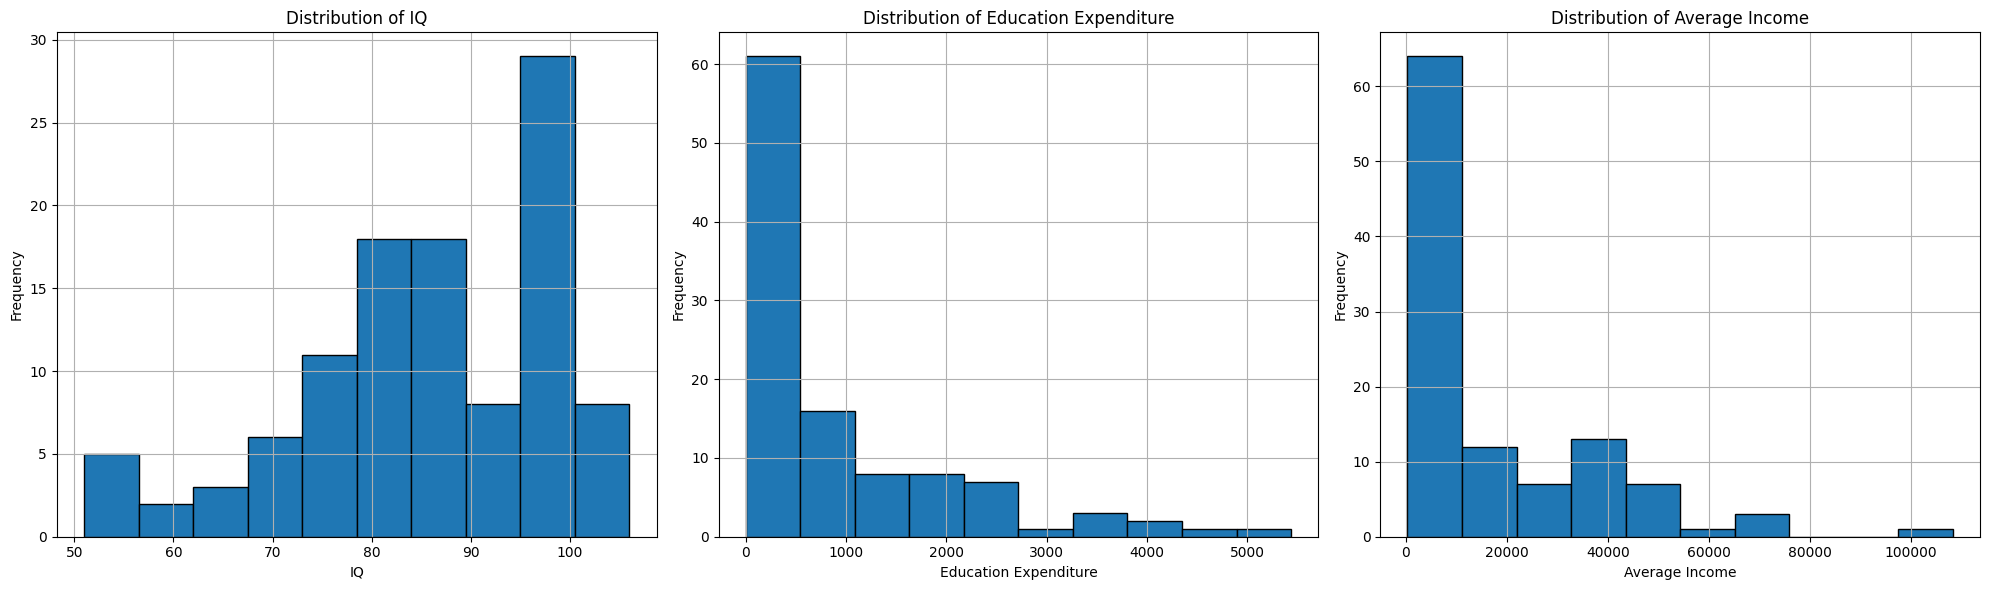

In [71]:
# Plot histograms
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
Iq_It_f['IQ'].hist(bins=10, edgecolor='black')
plt.title('Distribution of IQ')
plt.xlabel('IQ')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
Iq_It_f['education_expenditure'].hist(bins=10, edgecolor='black')
plt.title('Distribution of Education Expenditure')
plt.xlabel('Education Expenditure')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
Iq_It_f['avg_income'].hist(bins=10, edgecolor='black')
plt.title('Distribution of Average Income')
plt.xlabel('Average Income')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

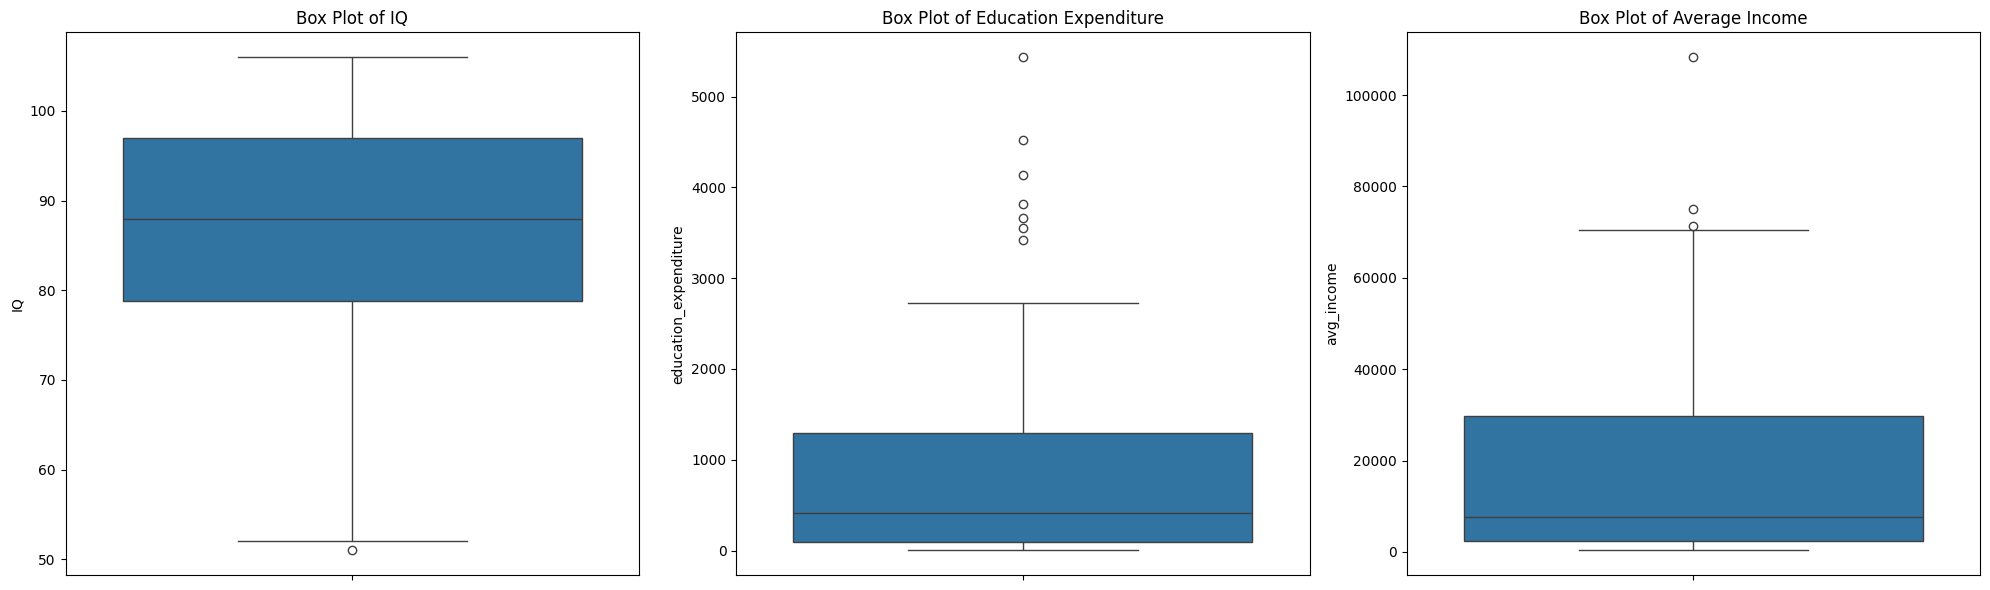

In [72]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=Iq_It_f['IQ'])
plt.title('Box Plot of IQ')

plt.subplot(1, 3, 2)
sns.boxplot(y=Iq_It_f['education_expenditure'])
plt.title('Box Plot of Education Expenditure')

plt.subplot(1, 3, 3)
sns.boxplot(y=Iq_It_f['avg_income'])
plt.title('Box Plot of Average Income')

plt.tight_layout()
plt.show()


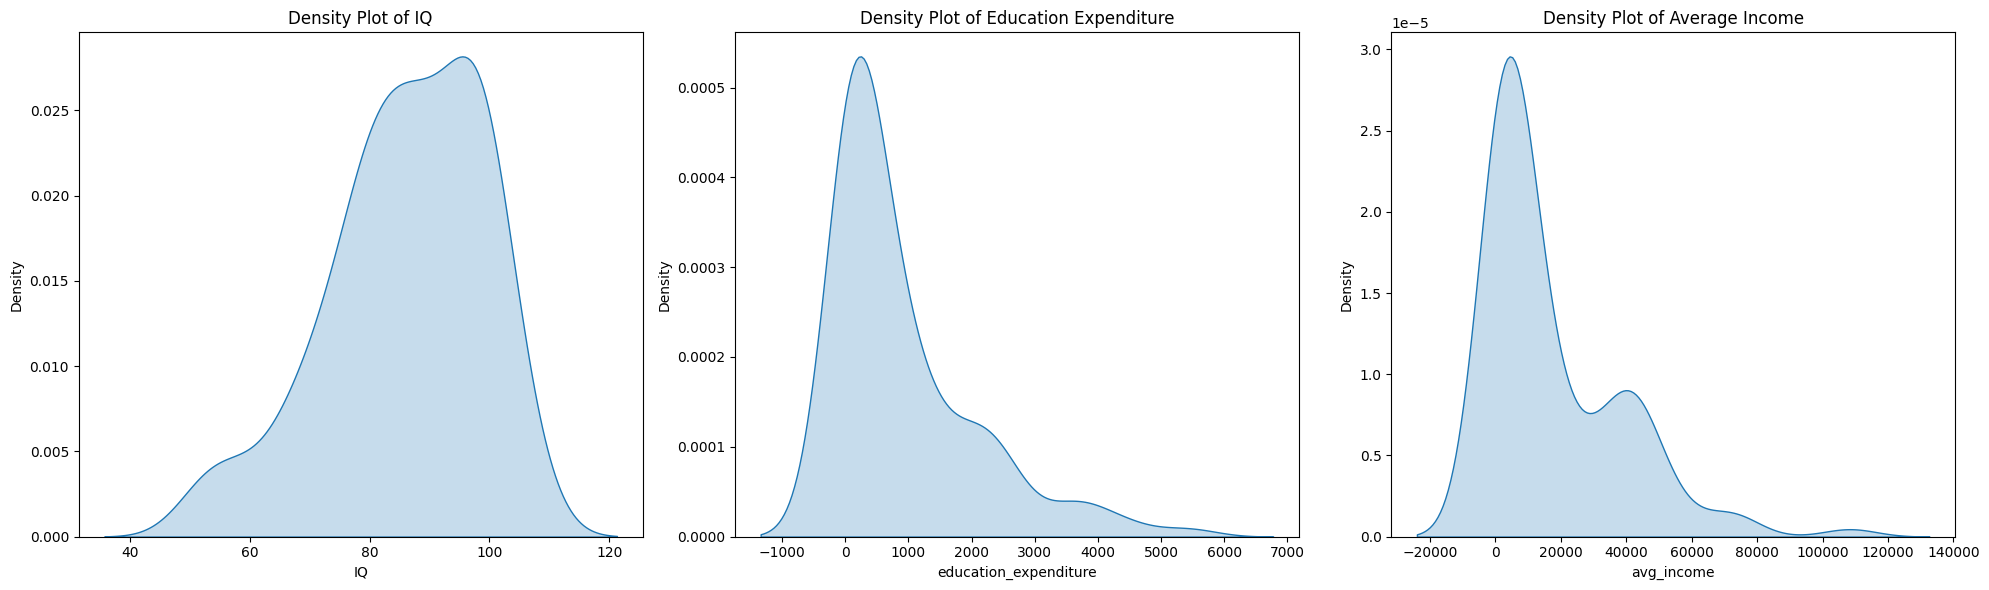

In [73]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.kdeplot(Iq_It_f['IQ'], fill=True)
plt.title('Density Plot of IQ')

plt.subplot(1, 3, 2)
sns.kdeplot(Iq_It_f['education_expenditure'], fill=True)
plt.title('Density Plot of Education Expenditure')

plt.subplot(1, 3, 3)
sns.kdeplot(Iq_It_f['avg_income'], fill=True)
plt.title('Density Plot of Average Income')

plt.tight_layout()
plt.show()


### Clone into train&test file

In [74]:
import os

clone_directory = 'clone_data'
train_filepath = os.path.join(clone_directory, 'IqIt_train.csv')


test_filepath = os.path.join(clone_directory, 'IqIt_test.csv')


if not os.path.exists(clone_directory):
    os.makedirs(clone_directory)

Iq_It_f.to_csv(train_filepath)

Iq_It_f.to_csv(test_filepath)



# 2. Selection

In [75]:
IqIt_train = pd.read_csv("../src/clone_data/IqIt_train.csv")

## 2.1. Information Gain

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import mutual_info_regression

Features: avg_temp Score:  0.4810454895243792
Features: avg_income Score:  0.42482287029206
Features: education_expenditure Score:  0.39027567100714977


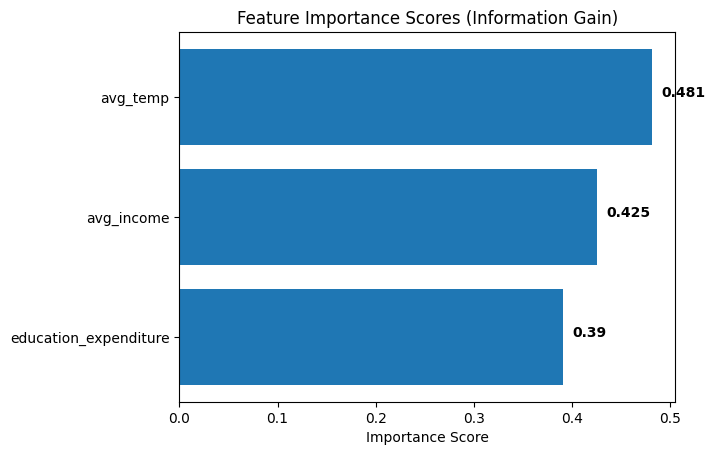

In [77]:
x = IqIt_train.drop(columns=["Unnamed: 0","country","Id","IQ","IQ_Level"])
y = IqIt_train["IQ_Level"]

#Apply Information Gain
ig = mutual_info_regression(x,y)

#Create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(x.columns)):
    feature_scores[x.columns[i]] = ig[i]

# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

#Sort the features by importance scores and the sorted features
for feature, score in sorted_features:
    print("Features:", feature, "Score: ", score)

#Plot a horizontal bar chat of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

## 2.2. Forward Selection

In [78]:
# from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
# Split the dataset into features and target
X = IqIt_train.drop(columns=["Unnamed: 0","country","Id","IQ","IQ_Level"])
y = IqIt_train["IQ_Level"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the logistic regression model
model = LinearDiscriminantAnalysis()

# Define the forward selection object
sfs = SFS(model, k_features=3, forward=True, floating=False, scoring="accuracy", cv=5)

# Perform forward selection on the training set
sfs.fit(X_train, y_train)

# Print the selected features
print("Selected Features:", sfs.k_feature_names_)


NameError: name 'wo_train' is not defined

In [ ]:
# Evaluate the performance of the selected features on the testing set
accuracy = sfs.k_score_
print("Accuracy:", accuracy)

In [ ]:
# Plot the performance of the model with different feature subsets
sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_df["avg_score"] = sfs_df["avg_score"].astype(float)
fig, ax = plt.subplots()
sfs_df.plot(kind="line", y="avg_score", ax=ax)
ax.set_xlabel("Number of Features")
ax.set_ylabel("Accuracy")
ax.set_title("Forward Selection Performance")
plt.show()

## 2.3. Chi_Square

In [ ]:
from sklearn.feature_selection import chi2
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

<Axes: >

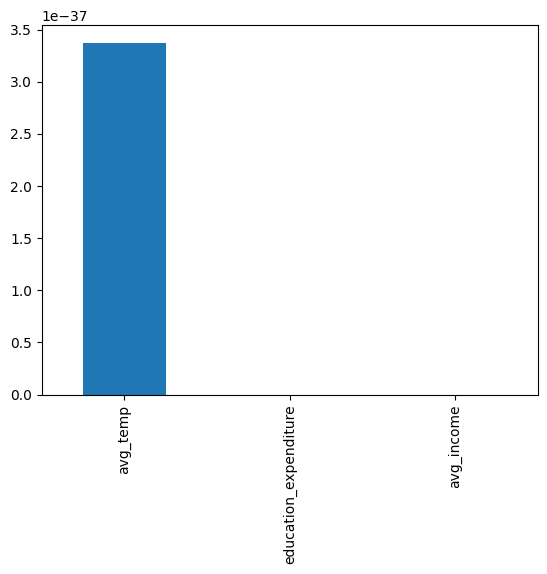

In [ ]:
# Split the dataset into features and target
X = IqIt_train.drop(columns=["Unnamed: 0","country","Id","IQ","IQ_Level"])
y = IqIt_train["IQ_Level"]

chi_scores = chi2(X, y)

p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)

p_values.plot.bar()

# 3. Split and Prepare Data

In [ ]:
from sklearn.model_selection import train_test_split

## IQ Country and Income&Temperature

In [ ]:
X_iqit = IqIt_train[
    [
        "education_expenditure",
        "avg_income",
        "avg_temp"
    ]
]

Y_iqit = IqIt_train["IQ_Level"]

X_train_iqit, X_test_iqit, Y_train_iqit, Y_test_iqit = train_test_split(
    X_iqit, Y_iqit, test_size = 0.1, random_state=42
)

# 4. Modeling
#### Decision Tree, Logistic Regression, Random Forest, KNN, Naive Bayes, SVM

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

num_folds = 10
seed = 7
scoring = "accuracy"

models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))

In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits = num_folds, random_state = None)
    cv_results = cross_val_score(
        model, X_train_iqit, Y_train_iqit, cv = kfold, scoring = scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

LR: 0.260000 (0.110465)
LDA: 0.353333 (0.122000)
KNN: 0.167778 (0.108804)
CART: 0.281111 (0.186127)
NB: 0.281111 (0.137441)
SVM: 0.196667 (0.112002)


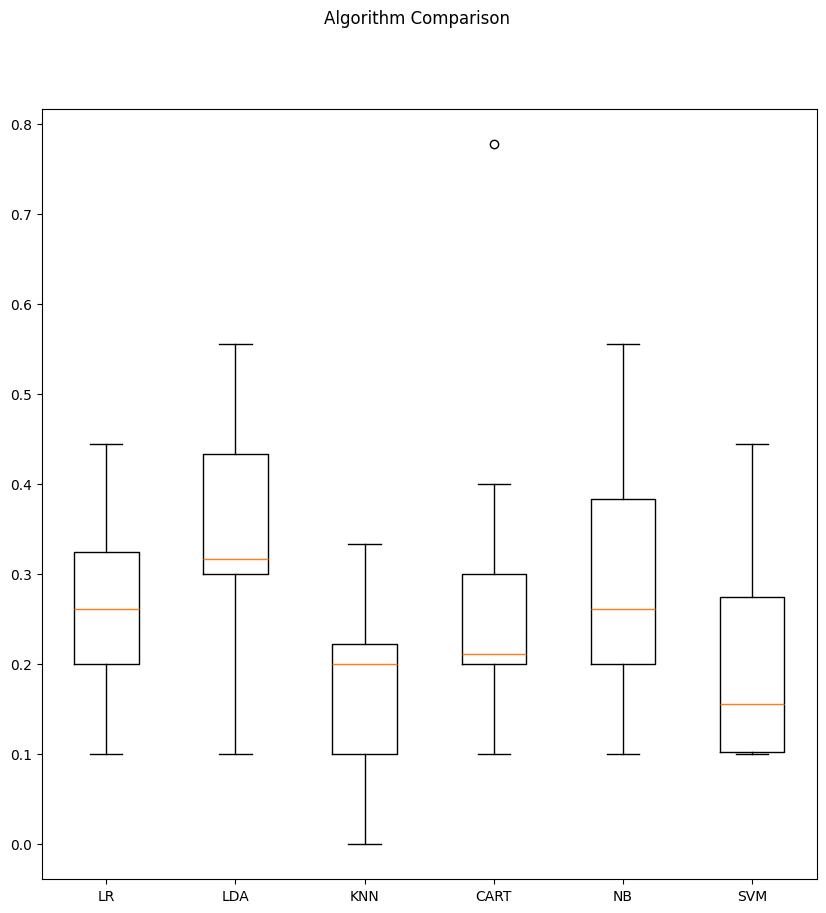

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
pipelines = []
pipelines.append(
    ("ScaledLR", Pipeline([("Scaler", StandardScaler()), ("LR", LogisticRegression())]))
)
pipelines.append(
    (
        "ScaledLDA",
        Pipeline([("Scaler", StandardScaler()), ("LDA", LinearDiscriminantAnalysis())]),
    )
)
pipelines.append(
    (
        "ScaledKNN",
        Pipeline([("Scaler", StandardScaler()), ("KNN", KNeighborsClassifier())]),
    )
)
pipelines.append(
    (
        "ScaledCART",
        Pipeline([("Scaler", StandardScaler()), ("CART", DecisionTreeClassifier())]),
    )
)
pipelines.append(
    ("ScaledNB", Pipeline([("Scaler", StandardScaler()), ("NB", GaussianNB())]))
)
pipelines.append(
    ("ScaledSVM", Pipeline([("Scaler", StandardScaler()), ("SVM", SVC())]))
)
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_iqit, Y_train_iqit, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.353333 (0.137419)
ScaledLDA: 0.353333 (0.122000)
ScaledKNN: 0.291111 (0.178664)
ScaledCART: 0.261111 (0.152125)
ScaledNB: 0.281111 (0.137441)
ScaledSVM: 0.333333 (0.136445)


LDA - LR - SVM

In [ ]:
ensembles = []
ensembles.append(("AB", AdaBoostClassifier()))
ensembles.append(("GBM", GradientBoostingClassifier()))
ensembles.append(("RF", RandomForestClassifier()))
ensembles.append(("ET", ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_iqit, Y_train_iqit, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 

AB: 0.302222 (0.140528)
GBM: 0.267778 (0.150427)
RF: 0.383333 (0.140655)
ET: 0.457778 (0.228565)


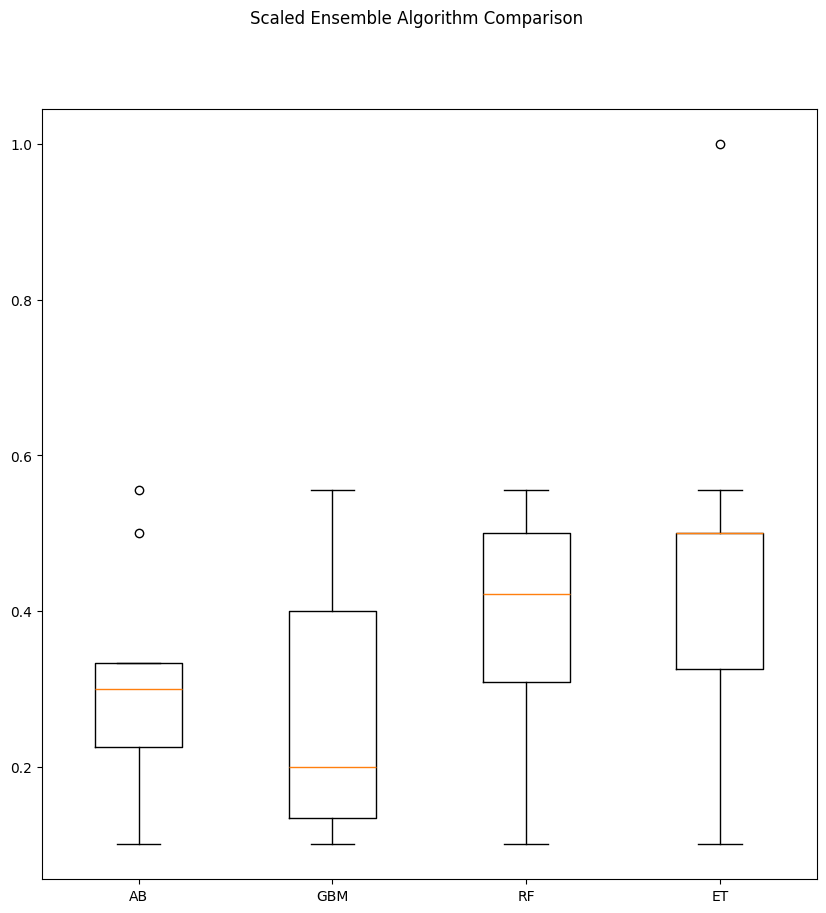

In [ ]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle("Scaled Ensemble Algorithm Comparison")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# 5. Tuning Data

In [ ]:
# data standardization
scaler = StandardScaler().fit(X_train_iqit)
rescaledX = scaler.transform(X_train_iqit)

In [ ]:
# LDA
# Implementing Grid Search and Linear Discriminant Analysis
# -> Finfing best parameters 
scaler = StandardScaler().fit(X_train_iqit)
rescaledX = scaler.transform(X_train_iqit)
shrinkage_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.05, 0.25, 0.15, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
solver_values = ["lsqr", "eigen"]  # Loại bỏ 'svd' khỏi solver_values

param_grid = dict(shrinkage=shrinkage_values, solver=solver_values)

model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_iqit)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

## -> Here, we can get the best result. It provides the best hyperparameter for LDA model -> Helping improve and deploy the model with best performance
### These values use for several steps: evaluation on test set, model deployment, result analysis and report

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\covariance\_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\covariance\_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\covariance\_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\covariance\_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\covariance\_empirical_covariance.py:102: Us

Best: 0.363333 using {'shrinkage': 0.3, 'solver': 'lsqr'}
0.353333 (0.122000) with: {'shrinkage': 0.1, 'solver': 'lsqr'}
0.353333 (0.122000) with: {'shrinkage': 0.1, 'solver': 'eigen'}
0.353333 (0.122000) with: {'shrinkage': 0.2, 'solver': 'lsqr'}
0.353333 (0.122000) with: {'shrinkage': 0.2, 'solver': 'eigen'}
0.363333 (0.121315) with: {'shrinkage': 0.3, 'solver': 'lsqr'}
0.363333 (0.121315) with: {'shrinkage': 0.3, 'solver': 'eigen'}
0.353333 (0.113507) with: {'shrinkage': 0.4, 'solver': 'lsqr'}
0.353333 (0.113507) with: {'shrinkage': 0.4, 'solver': 'eigen'}
0.343333 (0.121863) with: {'shrinkage': 0.5, 'solver': 'lsqr'}
0.343333 (0.121863) with: {'shrinkage': 0.5, 'solver': 'eigen'}
0.343333 (0.121863) with: {'shrinkage': 0.6, 'solver': 'lsqr'}
0.343333 (0.121863) with: {'shrinkage': 0.6, 'solver': 'eigen'}
0.322222 (0.115149) with: {'shrinkage': 0.7, 'solver': 'lsqr'}
0.322222 (0.115149) with: {'shrinkage': 0.7, 'solver': 'eigen'}
0.322222 (0.115149) with: {'shrinkage': 0.8, 'solver'

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\covariance\_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\covariance\_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\covariance\_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\covariance\_empirical_covariance.py:102: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


In [ ]:
# LR
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
penalty = ["none", "elasticnet", "l1", "l2"]
C = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
param_grid = dict(solver=solver, penalty=penalty, C=C)
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_iqit)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Best: 0.385556 using {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
nan (nan) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'newton-cg'}
nan (nan) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'lbfgs'}
nan (nan) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'liblinear'}
nan (nan) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'sag'}
nan (nan) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'saga'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'sag'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'saga'}
nan (nan) with: {'C': 1e-06, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (nan) with: {'C': 1e-06, 'penalty': 'l1', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 1e-06, 'penalty': 'l1', 'solver': 'liblinear'}
nan (nan) w

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1170 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Admin\AppData\Local\

In [ ]:
# SVM
param_grid = {
    "C": [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000],
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
    "kernel": ["rbf"],
}
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_iqit)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.364444 using {'C': 100000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.278889 (0.152708) with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.266667 (0.181625) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.185556 (0.139846) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.175556 (0.134788) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.175556 (0.134788) with: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.345556 (0.167365) with: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.313333 (0.124702) with: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.343333 (0.113361) with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.175556 (0.134788) with: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.175556 (0.134788) with: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.282222 (0.130261) with: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.324444 (0.167465) with: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.313333 (0.124702) with: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.343333 (0.113361) with: {'C': 10, 'gamma': 0.001, '

In [ ]:
# ET
param_grid = dict(
    n_estimators=np.array([230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280])
)
model = ExtraTreesClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_iqit)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.430000 using {'n_estimators': np.int64(255)}
0.410000 (0.143884) with: {'n_estimators': np.int64(230)}
0.410000 (0.143884) with: {'n_estimators': np.int64(235)}
0.420000 (0.146296) with: {'n_estimators': np.int64(240)}
0.420000 (0.146296) with: {'n_estimators': np.int64(245)}
0.420000 (0.146296) with: {'n_estimators': np.int64(250)}
0.430000 (0.154604) with: {'n_estimators': np.int64(255)}
0.430000 (0.154604) with: {'n_estimators': np.int64(260)}
0.430000 (0.141076) with: {'n_estimators': np.int64(265)}
0.430000 (0.141076) with: {'n_estimators': np.int64(270)}
0.430000 (0.141076) with: {'n_estimators': np.int64(275)}
0.430000 (0.141076) with: {'n_estimators': np.int64(280)}


In [ ]:
# RF
param_grid = dict(n_estimators=np.array([35, 40, 45, 55, 60, 65, 50, 48, 49, 51, 52]))
model = RandomForestClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_iqit)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.351111 using {'n_estimators': np.int64(45)}
0.340000 (0.127289) with: {'n_estimators': np.int64(35)}
0.328889 (0.132143) with: {'n_estimators': np.int64(40)}
0.351111 (0.164444) with: {'n_estimators': np.int64(45)}
0.351111 (0.164444) with: {'n_estimators': np.int64(55)}
0.330000 (0.137262) with: {'n_estimators': np.int64(60)}
0.341111 (0.158001) with: {'n_estimators': np.int64(65)}
0.340000 (0.145399) with: {'n_estimators': np.int64(50)}
0.351111 (0.164444) with: {'n_estimators': np.int64(48)}
0.340000 (0.145399) with: {'n_estimators': np.int64(49)}
0.351111 (0.164444) with: {'n_estimators': np.int64(51)}
0.340000 (0.145399) with: {'n_estimators': np.int64(52)}


## Results
- **LDA: Best: 0.029210 using {'shrinkage': 0.1, 'solver': 'lsqr'}**
- **LR: Best: 0.031707 using {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}**
- **SVM: Best: 0.034088 using {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}**
- **ET: Best: 0.021893 using {'n_estimators': np.int64(230)}**
- **RF: Best: 0.026771 using {'n_estimators': np.int64(35)}**

# 6. Data Fitting

## 6.1. LDA

In [ ]:
# LDA  'shrinkage': 0.1, 'solver': 'lsqr'
modelLDA = LinearDiscriminantAnalysis(shrinkage=0.3, solver="lsqr")
modelLDA.fit(X_train_iqit, Y_train_iqit)
predictions = modelLDA.predict(X_test_iqit)

print(accuracy_score(Y_train_iqit, modelLDA.predict(X_train_iqit)))
print(accuracy_score(Y_test_iqit, predictions))
print(confusion_matrix(Y_test_iqit, predictions))
print(classification_report(Y_test_iqit, predictions))

0.29896907216494845
0.09090909090909091
[[0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 3 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 2 0 0]]
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         1
          10       0.25      0.50      0.33         2
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2

    accuracy                           0.09        11
   macro avg       0.04      0.07      0.05        11
weighted avg       0.05      0.09      0.06        11



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

## 6.2. LR

In [ ]:
# LR 'C': 0.1, 'penalty': 'l2', 'solver': 'saga'
modelLG = LogisticRegression(C=10, penalty="l2", solver="liblinear")
modelLG.fit(X_train_iqit, Y_train_iqit)
predictions = modelLG.predict(X_test_iqit)

print(accuracy_score(Y_train_iqit, modelLG.predict(X_train_iqit)))
print(accuracy_score(Y_test_iqit, predictions))
print(confusion_matrix(Y_test_iqit, predictions))
print(classification_report(Y_test_iqit, predictions))

0.32989690721649484
0.0
[[0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 2 0 0 0 0 0]]
              precision    recall  f1-score   support

           5       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       4.0
           9       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       2.0
          11       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       2.0

    accuracy                           0.00      11.0
   macro avg       0.00      0.00      0.00      11.0
weighted avg       0.00      0.00      0.00      11.0



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

## 6.3. SVM

In [ ]:
# SVM 'C': 10, 'gamma': 0.1, 'kernel': 'rbf'
modelSVM = SVC(C=1000000, gamma=0.001, kernel="rbf")
modelSVM.fit(X_train_iqit, Y_train_iqit)
predictions = modelSVM.predict(X_test_iqit)

print(accuracy_score(Y_train_iqit, modelSVM.predict(X_train_iqit)))
print(accuracy_score(Y_test_iqit, predictions))
print(confusion_matrix(Y_test_iqit, predictions))
print(classification_report(Y_test_iqit, predictions))

1.0
0.18181818181818182
[[0 0 0 1 0 0]
 [0 0 0 4 0 0]
 [0 0 0 1 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 0 1]
 [0 0 0 2 0 0]]
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         1
          10       0.20      1.00      0.33         2
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2

    accuracy                           0.18        11
   macro avg       0.03      0.17      0.06        11
weighted avg       0.04      0.18      0.06        11



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## 6.4. ET

In [ ]:
# ET 'n_estimators': 230
modelET = ExtraTreesClassifier(n_estimators=250)
modelET.fit(X_train_iqit, Y_train_iqit)
predictions = modelET.predict(X_test_iqit)

print(accuracy_score(Y_train_iqit, modelET.predict(X_train_iqit)))
print(accuracy_score(Y_test_iqit, predictions))
print(confusion_matrix(Y_test_iqit, predictions))
print(classification_report(Y_test_iqit, predictions))

1.0
0.2727272727272727
[[0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 2 0 0 1 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 1 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 1 0]]
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           8       0.67      0.50      0.57         4
           9       0.00      0.00      0.00         1
          10       0.50      0.50      0.50         2
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2

    accuracy                           0.27        11
   macro avg       0.17      0.14      0.15        11
weighted avg       0.33      0.27      0.30        11



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

## 6.5. RF

In [ ]:
# RF 'n_estimators': 35'
modelRF = RandomForestClassifier(n_estimators=51)
modelRF.fit(X_train_iqit, Y_train_iqit)
predictions = modelRF.predict(X_test_iqit)

print(accuracy_score(Y_train_iqit, modelRF.predict(X_train_iqit)))
print(accuracy_score(Y_test_iqit, predictions))
print(confusion_matrix(Y_test_iqit, predictions))
print(classification_report(Y_test_iqit, predictions))

1.0
0.45454545454545453
[[0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 3 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 1 0]]
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.75      0.75      0.75         4
           9       0.00      0.00      0.00         1
          10       1.00      0.50      0.67         2
          11       0.50      1.00      0.67         1
          12       0.00      0.00      0.00         2

    accuracy                           0.45        11
   macro avg       0.28      0.28      0.26        11
weighted avg       0.50      0.45      0.45        11



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

# 7. Apply Model

In [ ]:
iqit_test = pd.read_csv("../src/clone_data/IqIt_test.csv")

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_iqit_test = iqit_test[
    [
        "education_expenditure",
        "avg_income",
        "avg_temp"
    ]
]
Y_iqit_test = iqit_test["IQ_Level"]

Accuracy Score: 0.39814814814814814
Confusion Matrix:
 [[ 0  0  0  0  0  0  1  1  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  2  0  0  0  0]
 [ 0  0  0  0  0  0  2  3  0  0  0  0]
 [ 0  0  0  0  0  0  6  4  0  0  0  0]
 [ 0  0  0  0  0  0 14  3  0  0  0  0]
 [ 0  0  0  0  0  0  8  6  3  0  0  0]
 [ 0  0  0  0  0  0  2  2  3  1  0  0]
 [ 0  0  0  0  0  0  1  0  2 18  1  0]
 [ 0  0  0  0  0  0  0  1  1  7  2  0]
 [ 0  0  0  0  0  0  3  0  1  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        10
           7       0.30      0.82      0.44        17
           8       

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

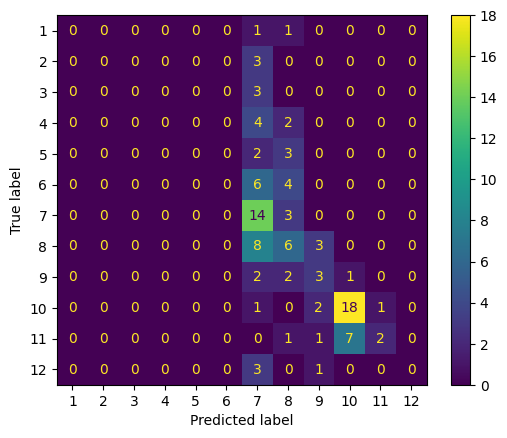

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create and fit the LDA model
modelLDA = LinearDiscriminantAnalysis(solver="lsqr")
modelLDA.fit(X_train_iqit, Y_train_iqit)

# Make predictions
predictions = modelLDA.predict(X_iqit_test)

# Print evaluation metrics
print("Accuracy Score:", accuracy_score(Y_iqit_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(Y_iqit_test, predictions))
print("Classification Report:\n", classification_report(Y_iqit_test, predictions))

# Display confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_iqit_test, predictions),
    display_labels=modelLDA.classes_,
)
disp.plot()
plt.show()


0.2962962962962963
[[ 0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  1  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  1  0  0]
 [ 0  0  0  0  0  0 16  0  0  1  0  0]
 [ 0  0  0  0  0  0  6  0  1  1  0  0]
 [ 0  0  0  0  0  0  8  0  0 14  0  0]
 [ 0  0  0  0  0  0  3  0  0  8  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  1  0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       1.00      0.17      0.29         6
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        10
           7       0.20      0.94      0.33        17
           8       0.00      0.00      0.00        17
           9       1.00  

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

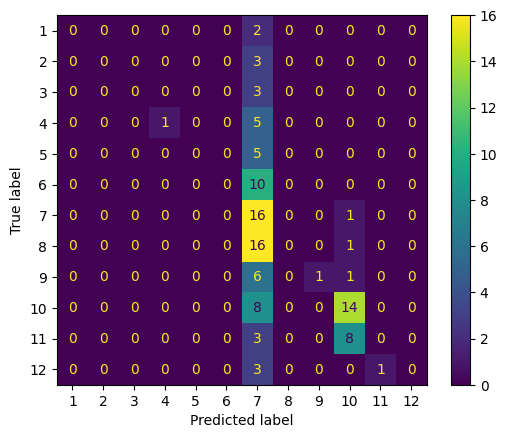

In [ ]:
# LG 'C': 1e-06, 'penalty': 'none', 'solver': 'newton-cg'
modelLG = LogisticRegression(C=10, penalty="l2", solver="liblinear")
modelLG.fit(X_train_iqit, Y_train_iqit)
predictions = modelLG.predict(X_iqit_test)

print(accuracy_score(Y_iqit_test, predictions))
print(confusion_matrix(Y_iqit_test, predictions))
print(classification_report(Y_iqit_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_iqit_test, predictions),
    display_labels=modelLG.classes_,
)
t = disp.plot()
plt.show()

0.9166666666666666
[[ 2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  1  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 13  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  7  1  0  0]
 [ 0  0  0  0  0  0  0  0  0 22  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  1]
 [ 0  0  0  0  0  0  0  0  0  2  0  2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         6
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        17
           8       1.00      0.76      0.87        17
           9       1.00  

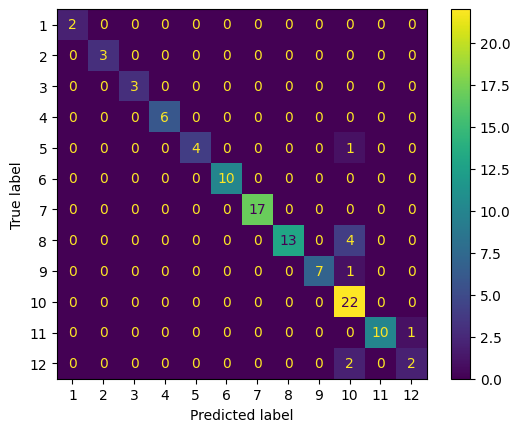

In [ ]:
# SVM 'C': 100000, 'gamma': 0.001, 'kernel': 'rbf'
modelSVM = SVC(C=1000000, gamma=0.001, kernel="rbf")
modelSVM.fit(X_train_iqit, Y_train_iqit)
predictions = modelSVM.predict(X_iqit_test)

print(accuracy_score(Y_iqit_test, predictions))
print(confusion_matrix(Y_iqit_test, predictions))
print(classification_report(Y_iqit_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_iqit_test, predictions),
    display_labels=modelSVM.classes_,
)
t = disp.plot()
plt.show()

0.9259259259259259
[[ 2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  1  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 15  0  0  1  0]
 [ 0  0  0  0  0  0  0  1  7  0  0  0]
 [ 0  0  0  0  0  0  0  0  1 21  0  0]
 [ 0  0  0  0  0  0  0  0  0  1 10  0]
 [ 0  0  0  0  0  0  1  0  0  0  1  2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         6
           5       1.00      0.80      0.89         5
           6       0.91      1.00      0.95        10
           7       0.89      1.00      0.94        17
           8       0.94      0.88      0.91        17
           9       0.88  

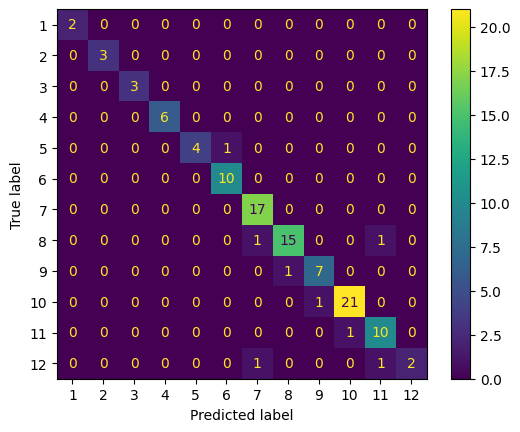

In [ ]:
# ET 'n_estimators': 260
modelET = ExtraTreesClassifier(n_estimators=250)
modelET.fit(X_train_iqit, Y_train_iqit)
predictions = modelET.predict(X_iqit_test)

print(accuracy_score(Y_iqit_test, predictions))
print(confusion_matrix(Y_iqit_test, predictions))
print(classification_report(Y_iqit_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_iqit_test, predictions),
    display_labels=modelET.classes_,
)
t = disp.plot()
plt.show()

0.9444444444444444
[[ 2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  1  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  7  0  0  0]
 [ 0  0  0  0  0  0  0  0  1 21  0  0]
 [ 0  0  0  0  0  0  0  0  0  1 10  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  3]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         6
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00        10
           7       0.85      1.00      0.92        17
           8       0.94      0.94      0.94        17
           9       0.88  

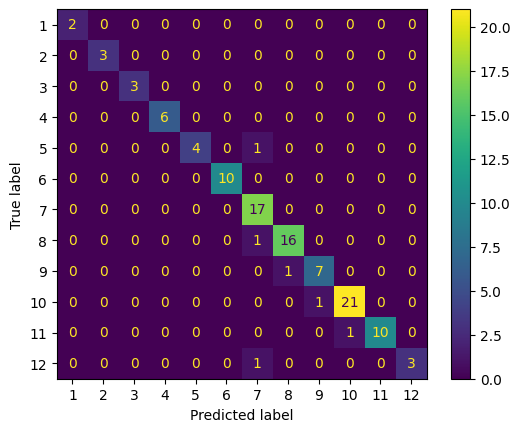

In [ ]:
# RF 'n_estimators': 55'
modelRF = RandomForestClassifier(n_estimators=51)
modelRF.fit(X_train_iqit, Y_train_iqit)
predictions = modelRF.predict(X_iqit_test)

print(accuracy_score(Y_iqit_test, predictions))
print(confusion_matrix(Y_iqit_test, predictions))
print(classification_report(Y_iqit_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_iqit_test, predictions),
    display_labels=modelRF.classes_,
)
t = disp.plot()
plt.show()